# K-means clustering

# Importing libraries

In [34]:
#install.packages("tm", repo='https://ftp.uni-sofia.bg/CRAN/', dependencies = T)
#install.packages("SnowballC", repo='https://ftp.uni-sofia.bg/CRAN/', dependencies = T)
#install.packages("rgl", repo='https://ftp.uni-sofia.bg/CRAN/')
#install.packages("scatterplot3d", repo='https://ftp.uni-sofia.bg/CRAN/')

library(tm)
library("SnowballC")
library(rgl)
library(scatterplot3d)

# Texts paths

In [35]:
dictPaths <- c("C:\\Users\\Illia\\Anaconda3\\Deep Learning\\SA\\lab4\\dicts\\currency", 
              "C:\\Users\\Illia\\Anaconda3\\Deep Learning\\SA\\lab4\\dicts\\astronomy", 
              "C:\\Users\\Illia\\Anaconda3\\Deep Learning\\SA\\lab4\\dicts\\genetics")
filesDir <- "C:\\Users\\Illia\\Anaconda3\\Deep Learning\\SA\\lab4\\files\\"
kMeanFiles <- c("genetics1.txt", "genetics2.txt", "genetics3.txt", "genetics5.txt",
                "astronomy1.txt", "astronomy2.txt", "astronomy3.txt", "astronomy5.txt",
                "currency1.txt", "currency2.txt", "currency3.txt", "currency5.txt")

testFiles <- c("genetics5.txt",
                "astronomy5.txt",
                "currency5.txt")

# Functions

In [32]:
prepareTextForAnalizing <- function(text) {
  result <- tm_map(text, iconv, 'cp1251', 'UTF-8')
  result <- tm_map(result, stripWhitespace)
  result <- tm_map(result, tolower)
  result <- tm_map(result, removeNumbers)
  result <- tm_map(result, removeWords, stopwords("english"))
  result <- tm_map(result, removePunctuation)
  
  return(result)
}

getCorpusSingleFile <- function(path) {
  conn <- file(path, "r")
  fulltext <- readLines(conn)
  close(conn)
  
  vs <- VectorSource(fulltext)
  return(Corpus(vs, readerControl=list(readPlain, language="en", load=TRUE)))
}

getCorpustMultipleFiles <- function(path) {
  return(Corpus(DirSource(path), 
         readerControl = list(reader = readPlain,
                              language = "en",
                              load = T)
         ))
}

formDictionary <- function(preparedText) {
  docs <- tm_map(preparedText, stemDocument)
  dtm <- TermDocumentMatrix(docs)
  dict <- as.matrix(dtm)
  
  return(dict)
} 

sortWordsByFreq <- function(dict) {
  v <- sort(rowSums(dict), decreasing = TRUE)
  sortedDict <- data.frame(word = names(v), freq = v)
  
  return(sortedDict)
}

getDictionary <- function(corpus, amountOfWords = -1){
  articles <- prepareTextForAnalizing(corpus)
  dict <- formDictionary(articles)
  h <- sortWordsByFreq(dict)
  
  if(amountOfWords != -1) {
    h <- head(h, amountOfWords)
  }
  
  s <- sum(c(h$freq))
  freq <- c()
  print(h)
  for(item in h$freq) {
    freq <- c(freq, item / s)
    #print(item)
  }
  h$freq <- freq
  return(h)
}

getMapFromDictionary <- function(dict) {
  keys <- unlist(dict$word)
  map <- c(dict$freq)
  names(map) <- keys
  
  return(map)
}

getCoordinatesOfDict <- function(vectors, mappedDict){
  result <- c(0, 0, 0)
  keys <- names(mappedDict)
  #print(result)
  #print(vectors)
  #print(length(vectors))
  for (key in keys) {
    for(i in 1:length(vectors)) {
      if (key %in% names(vectors[[i]])){
        result[i] <- result[i] + mappedDict[key] * vectors[[i]][key] * 10000 
      }
    }
  }
  
  return(result)
}

#attach(mtcars)
build3dPlot <- function(data) {
  
  currency <- unlist(lapply(data, function(x) x[[2]][1]))
  astronomy <- unlist(lapply(data, function(x) x[[2]][2]))
  genetics <- unlist(lapply(data, function(x) x[[2]][3]))
  
  scatterplot3d(currency, astronomy, genetics, main="Clusters plot")
}

getListOfFilesCoordinates <- function(filesPath, dicts) {
  i <- 1
  testFilesCoordinates <- list()
  for(fileName in filesPath) {
    h <- getDictionary(getCorpusSingleFile(fileName))
    testDict <- getMapFromDictionary(h)
    a <- getCoordinatesOfDict(vectors = dicts, mappedDict = testDict)
    testFilesCoordinates[[i]] <- list(fileName, a)
    i <- i + 1
  }
  return(testFilesCoordinates)
}

getListOfDictsForTexts <- function(dictPaths, sizeOfDict) {
  dicts <- list()
  i <- 1
  for(path in dictPaths) {
    h <- getDictionary(getCorpustMultipleFiles(path), sizeOfDict)
    #print(h)
    dicts[[i]] <- getMapFromDictionary(h)
    i <- i + 1
  }
  return(dicts)
}

getPrediction <- function(coord, clusters) {
  
  predict <- c(sqrt((clusters[1,][1] - coord[1])**2 + 
                     (clusters[1,][2] - coord[2])**2 +
                     (clusters[1,][3] - coord[3])**2), 1)
  len <- 1
  clustNum <- 2
  i <- 1
  for(i in 2:3) {
    current <- sqrt((clusters[i,][1] - coord[1])**2 + 
                      (clusters[i,][2] - coord[2])**2 +
                      (clusters[i,][3] - coord[3])**2)
    if(current < predict[len]){
      predict <- c(current, i)
    }
    i <- i + 1
  }
  return(predict)
}

                 word freq
bitcoin       bitcoin   88
cryptocurr cryptocurr   79
can               can   40
digit           digit   30
use               use   29
said             said   28
asset           asset   27
transact     transact   27
money           money   26
network       network   25
currenc       currenc   23
talk             talk   23
utc               utc   22
financi       financi   21
one               one   21
will             will   21
chia             chia   21
miner           miner   21
get               get   20
ladislav     ladislav   20
mecir           mecir   20
coin             coin   19
invest         invest   19
itвђ\231           itвђ\231   19
know             know   19
peopl           peopl   19
make             make   17
work             work   17
novemb         novemb   17
like             like   16
say               say   16
system         system   16
blockchain blockchain   16
вђ“               вђ“   16
commod         commod   16
articl         articl 

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                       word freq
clone                 clone   49
anim                   anim   36
cell                   cell   16
gene                   gene   16
chromosom         chromosom   13
cow                     cow   12
differ               differ   11
work                   work   11
westhusin         westhusin   11
say                     say   10
get                     get    9
born                   born    8
scientist         scientist    8
sheep                 sheep    8
peopl                 peopl    8
one                     one    8
might                 might    7
milk                   milk    6
right                 right    6
adult                 adult    6
first                 first    6
even                   even    6
develop             develop    6
make                   make    6
eat                     eat    5
research           research    5
way                     way    5
can                     can    5
involv               involv    5
like      

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                     word freq
clone               clone   22
cell                 cell   17
said                 said   13
monkey             monkey   12
research         research   10
human               human    9
develop           develop    9
hua                   hua    8
poo                   poo    8
use                   use    7
transfer         transfer    7
zhong               zhong    6
somat               somat    6
babi                 babi    5
creat               creat    5
nuclear           nuclear    5
way                   way    4
scienc             scienc    4
two                   two    4
diseas             diseas    4
dolli               dolli    4
primat             primat    4
sheep               sheep    4
will                 will    4
surrog             surrog    4
adult               adult    4
techniqu         techniqu    4
reprogram       reprogram    4
academi           academi    3
mume                 mume    3
genet               genet    3
studi   

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                         word freq
clone                   clone   98
cell                     cell   52
anim                     anim   26
human                   human   24
embryo                 embryo   22
research             research   21
use                       use   20
genet                   genet   16
gene                     gene   15
produc                 produc   14
reproduct           reproduct   14
ident                   ident   13
egg                       egg   13
stem                     stem   13
therapeut           therapeut   12
can                       can   10
copi                     copi   10
differ                 differ   10
sheep                   sheep   10
dna                       dna   10
creat                   creat    9
type                     type    9
diseas                 diseas    9
potenti               potenti    9
organ                   organ    8
nucleus               nucleus    8
somat                   somat    8
first               

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                           word freq
clone                     clone   22
say                         say   16
primat                   primat   12
use                         use   11
cell                       cell   11
human                     human    9
monkey                   monkey    9
genet                     genet    8
studi                     studi    8
poo                         poo    7
techniqu               techniqu    6
diseas                   diseas    6
research               research    6
also                       also    5
anim                       anim    5
disord                   disord    5
model                     model    5
ion                         ion    5
“                             “    5
creat                     creat    4
produc                   produc    4
parkinson’           parkinson’    4
birth                     birth    4
edit                       edit    4
live                       live    3
now                         now    3
s

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                         word freq
star                     star   14
flare                   flare   13
proxima               proxima    8
planet                 planet    7
—                           —    7
energi                 energi    7
way                       way    7
one                       one    6
team                     team    6
light                   light    6
theori                 theori    6
object                 object    6
’s                         ’s    5
sun                       sun    5
dwarf                   dwarf    5
known                   known    5
solar                   solar    5
data                     data    5
astrophys           astrophys    4
explain               explain    4
observ                 observ    4
earth                   earth    4
radiat                 radiat    4
also                     also    4
astronom             astronom    4
say                       say    4
scienc                 scienc    4
lightyear           

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                                     word freq
planet                             planet   49
star                                 star   41
—                                       —   22
light                               light   22
proxima                           proxima   21
’s                                     ’s   19
life                                 life   15
say                                   say   15
centauri                         centauri   14
earth                               earth   14
sun                                   sun   14
astronom                         astronom   14
just                                 just   13
one                                   one   12
atmospher                       atmospher   12
also                                 also   11
orbit                               orbit   10
like                                 like   10
telescop                         telescop   10
gas                                   gas   10
system       

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                             word freq
seager                     seager   53
planet                     planet   53
star                         star   29
—                               —   28
life                         life   27
atmospher               atmospher   27
light                       light   23
exoplanet               exoplanet   20
earth                       earth   19
astronom                 astronom   17
first                       first   17
atom                         atom   16
univers                   univers   14
use                           use   14
solar                       solar   13
one                           one   13
might                       might   13
orbit                       orbit   13
chemic                     chemic   13
world                       world   12
includ                     includ   12
gas                           gas   12
work                         work   12
system                     system   11
time                     

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                         word freq
planet                 planet   26
earth                   earth   17
mar                       mar   15
space                   space   12
spacecraft         spacecraft   12
organ                   organ   12
orbit                   orbit   11
—                           —   10
water                   water   10
life                     life   10
might                   might   10
nasa                     nasa   10
moon                     moon   10
mission               mission    9
germ                     germ    9
’s                         ’s    9
keep                     keep    8
can                       can    8
one                       one    8
environ               environ    8
live                     live    8
world                   world    7
infect                 infect    6
scientist           scientist    6
may                       may    6
scienc                 scienc    6
speci                   speci    6
say                 

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                             word freq
cryptocurr             cryptocurr   20
’s                             ’s   20
“                               “   18
said                         said   16
coin                         coin   13
market                     market   12
invest                     invest   12
money                       money   12
—                               —   11
bitcoin                   bitcoin    9
financi                   financi    8
like                         like    7
one                           one    7
work                         work    7
digit                       digit    6
get                           get    6
“’s                           “’s    6
”                               ”    6
less                         less    5
just                         just    5
investor                 investor    5
view                         view    5
cent                         cent    4
exchang                   exchang    4
recent                   

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                                       word freq
chia                                   chia   21
will                                   will    9
’s                                       ’s    9
work                                   work    8
cohen                                 cohen    7
investor                           investor    7
proof                                 proof    7
public                               public    6
“                                         “    6
compani                             compani    6
get                                     get    6
network                             network    6
use                                     use    6
bitcoin                             bitcoin    5
blockchain                       blockchain    5
say                                     say    5
singer                               singer    5
bid                                     bid    5
build                                 build    4
cryptocurr          

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                             word freq
bitcoin                   bitcoin   26
“                               “   11
cryptocurr             cryptocurr   10
said                         said    8
currenc                   currenc    6
world                       world    5
financi                   financi    5
told                         told    5
may                           may    4
bank                         bank    4
also                         also    4
digit                       digit    4
use                           use    4
comment                   comment    3
note                         note    3
describ                   describ    3
can                           can    3
februari                 februari    3
global                     global    3
invest                     invest    3
roubini                   roubini    3
bloomberg               bloomberg    3
economist               economist    3
predict                   predict    3
blockchain             bl

Warning message in tm_map.SimpleCorpus(text, iconv, "cp1251", "UTF-8"):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, stripWhitespace):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, tolower):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(result, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(preparedText, stemDocument):
"transformation drops documents"

                                                                                                                                         word
bitcoin                                                                                                                               bitcoin
asset                                                                                                                                   asset
talk                                                                                                                                     talk
utc                                                                                                                                       utc
ladislav                                                                                                                             ladislav
mecir                                                                                                                                   mecir
novemb

[1] "K-MEANS RESULT"


K-means clustering with 3 clusters of sizes 4, 4, 4

Cluster means:
      [,1]     [,2]       [,3]
1 61.44314 11.25222   8.640182
2 11.18020 57.66899  10.901901
3 14.86470 15.53735 153.310431

Clustering vector:
 [1] 3 3 3 3 2 2 2 2 1 1 1 1

Within cluster sum of squares by cluster:
[1] 1269.7601   46.1628 1833.1861
 (between_SS / total_SS =  95.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

[1] "CLUSTER GROUP 1"
[1] "Centers: 61.4431395719845, 11.252222660381, 8.64018195397489"
[1] "CLUSTER GROUP 2"
[1] "Centers: 11.1801964279944, 57.6689934936017, 10.9019011971249"
[1] "CLUSTER GROUP 3"
[1] "Centers: 14.8646967547569, 15.5373459839074, 153.310430761197"
[1] "-----------------------------------------------"
[1] "PREDICTION:"
[1] "C:\\Users\\Illia\\Anaconda3\\Deep Learning\\SA\\lab4\\files\\genetics1.txt to group  3"
[1] ""
[1] "C:\\Users\\Illia\\Anaconda3\\Deep Learning\\SA\\lab4\\files\\genetics2.txt to group  3"
[1] ""
[1] "C:\\Users\\Illia\\Anaconda3\\Deep Learning\\SA\\lab4\\files\\genetics3.txt to group  3"
[1] ""
[1] "C:\\Users\\Illia\\Anaconda3\\Deep Learning\\SA\\lab4\\files\\genetics5.txt to group  3"
[1] ""
[1] "C:\\Users\\Illia\\Anaconda3\\Deep Learning\\SA\\lab4\\files\\astronomy1.txt to group  2"
[1] ""
[1] "C:\\Users\\Illia\\Anaconda3\\Deep Learning\\SA\\lab4\\files\\astronomy2.txt to group  2"
[1] ""
[1] "C:\\Users\\Illia\\Anaconda3\\Deep Learning\\SA\\lab4

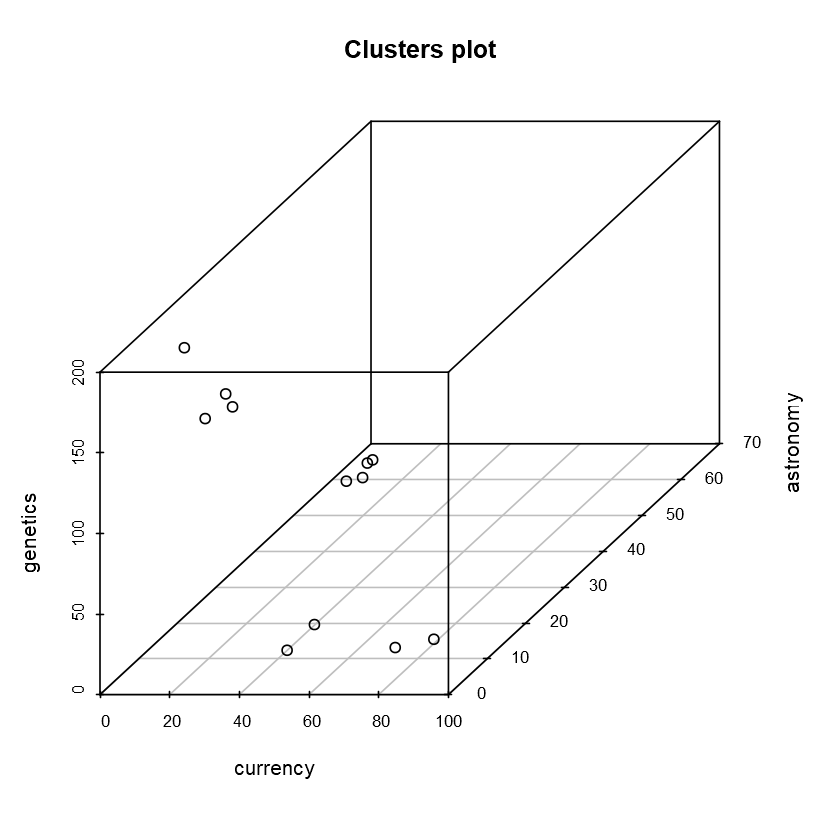

In [33]:
#get files names
kMeanFiles <- unlist(lapply(kMeanFiles, function(fname, dir){
  paste(dir, fname, sep="")
}, dir = filesDir))

testFiles <- unlist(lapply(testFiles, function(fname, dir){
  paste(dir, fname, sep="")
}, dir = filesDir))

#get dictionaries
dicts <- getListOfDictsForTexts(dictPaths = dictPaths, sizeOfDict = 60)

#get coordinates of files according to dictionaries
#for k-means files
kmfc <- getListOfFilesCoordinates(filesPath = kMeanFiles, 
                                  dicts = dicts)
tfc <- getListOfFilesCoordinates(filesPath = testFiles, 
                                 dicts = dicts)

build3dPlot(kmfc)

#get matrix of coordinates
l <- lapply(kmfc, function(el) el[[2]])
m <- matrix(unlist(l), ncol = 3, byrow = TRUE)

amountOfClusters <- 3
res <- kmeans(x = m, centers = amountOfClusters)
print("K-MEANS RESULT")
res

clusterVector <- res$cluster
for(i in 1:amountOfClusters) {
  clNum <- 1
  print(paste("CLUSTER GROUP ", toString(i), sep=""))
  print(paste("Centers:", toString(res$centers[i,], sep = "")))
  for(cl in clusterVector){
      clNum <- clNum + 1
  }
}
  
clusters <- matrix(res$centers, ncol=3)

print("-----------------------------------------------")

#clusterPlot3D(data = m, kmRes = res)
print("PREDICTION:")

for(fil in tfc){
  pred <- getPrediction(coord = fil[[2]], clusters = clusters)
  print(paste(fil[[1]], "to group ", pred[2], sep=" "))
  #addPoints(fil[[2]], pred[2])
  print("")        
}


print("-----------------------------------------------")